In [ ]:
#import Library(s)
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Tensorflow check
print(tf.__version__)

2.3.0


In [ ]:
#data preparing
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-16 02:36:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.70MB/s    in 45s     

2020-10-16 02:37:17 (6.81 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Zip file extracting
import zipfile,os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
#installing split_folders
!pip install split_folders

In [ ]:
import splitfolders
splitfolders.ratio(input='/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/split', ratio=(.6, .4))
base_dir= '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')


Copying files: 2188 files [00:00, 2826.79 files/s]


In [ ]:
#membuat direktori rock untuk data train dan data validasi
train_rock_dir = os.path.join(train_dir, 'rock')
validation_rock_dir = os.path.join(validation_dir, 'rock')

#membuat direktori paper untuk data train dan data validasi
train_paper_dir = os.path.join(train_dir, 'paper')
validation_paper_dir = os.path.join(validation_dir, 'paper')

#membuat direktori scissor untuk data train dan data validasi
train_scissor_dir = os.path.join(train_dir, 'scissor')
validation_scissor_dir = os.path.join(validation_dir, 'scissor')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode='categorical'
)

#dari 2188, data train(60%)= 1312. di kriteria submission ditulis 1314

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#membuat arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#compile model
from keras.optimizers import Adam, RMSprop, SGD
opt = RMSprop()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
#model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=25,
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2)

Epoch 1/25
25/25 - 7s - loss: 0.6260 - accuracy: 0.8300 - val_loss: 0.2082 - val_accuracy: 0.9500
Epoch 2/25
25/25 - 6s - loss: 0.3217 - accuracy: 0.9000 - val_loss: 0.2576 - val_accuracy: 0.9500
Epoch 3/25
25/25 - 6s - loss: 0.3293 - accuracy: 0.8800 - val_loss: 1.1564 - val_accuracy: 0.8000
Epoch 4/25
25/25 - 6s - loss: 0.4356 - accuracy: 0.8500 - val_loss: 0.1738 - val_accuracy: 0.9500
Epoch 5/25
25/25 - 6s - loss: 0.2359 - accuracy: 0.9300 - val_loss: 0.2008 - val_accuracy: 0.9000
Epoch 6/25
25/25 - 6s - loss: 0.1543 - accuracy: 0.9500 - val_loss: 0.2971 - val_accuracy: 0.9500
Epoch 7/25
25/25 - 6s - loss: 0.2210 - accuracy: 0.9200 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 8/25
25/25 - 6s - loss: 0.2764 - accuracy: 0.9300 - val_loss: 0.6303 - val_accuracy: 0.7500
Epoch 9/25
25/25 - 6s - loss: 0.3166 - accuracy: 0.8800 - val_loss: 0.2042 - val_accuracy: 0.9500
Epoch 10/25
25/25 - 6s - loss: 0.1785 - accuracy: 0.9400 - val_loss: 0.0476 - val_accuracy: 0.9500
Epoch 11/25
25/25 -

walaupun accuracynya sudah besar, tapi selisih antara loss dan val_loss nya sangat besar

tapi dengan hasil model fit seperti diatas, satu-satunya yang bisa memprediksi gambar (selain contoh dataset) dengan benar. sebelumnya, walaupun dengan mengubah jenis optimizers, menambahkan learning rate, serta menambahkan Dropout, pasti hasil prediksinya selalu paper.

Saving scissor.jpg to scissor.jpg
scissor.jpg
Scissor


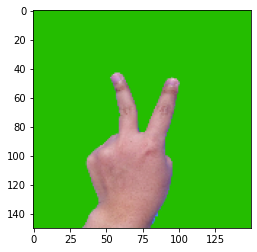

In [ ]:
#import library
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  else:
    print('Scissor')